In [6]:
import numpy as np
import lab3
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def gen_data(size=100, dim=2, separable=False):
    mean = np.random.poisson(3, dim) + 1
    cov = np.eye(dim, dim)
    if separable:
        X1 = np.random.multivariate_normal(mean, cov, size)
        X2 = np.random.multivariate_normal(-mean, cov, size)
    else:
        X1 = np.random.multivariate_normal(mean, cov, size)
        X2 = np.random.multivariate_normal(mean + 3, cov, size)
    X = np.vstack((X1, X2))
    y = np.array([-1]*size+[1]*size)
    return (X, y)

In [53]:
reload(lab3)
X1 = np.random.multivariate_normal([-3.0, 4.0], np.eye(2, 2), 50)
X2 = np.random.multivariate_normal([3.0, 4.0], np.eye(2, 2), 50)
X = np.vstack((X1, X2))
y = np.array([-1]*50+[1]*50)
X, y = gen_data(500, 2)
res = lab3.svm_qp_primal_solver(X, y, 1)
ans = lab3.compute_primal_objective(X, y, res['w0'], res['w'], 1)
x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
a = res['w'][0]
b = res['w'][1]
c = res['w0']
print(a, b, c, x_min, x_max)

1.64981001975 1.5578112354 -19.300316517934398 2.21986015663 10.8734744831


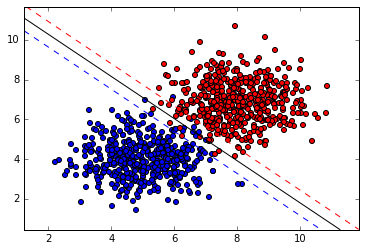

[ 1.64981002  1.55781124]


In [54]:
reload(lab3)
lab3.visualize(X, y, res['w0'], res['w'])
print(res['w'])


In [55]:
reload(lab3)
res = lab3.svm_qp_dual_solver(X, y, 1)
x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
a = res['w'][0]
b = res['w'][1]
c = res['w0']
print(a, b, c, x_min, x_max)


1.64981001975 1.5578112354 -19.300316517942132 2.21986015663 10.8734744831


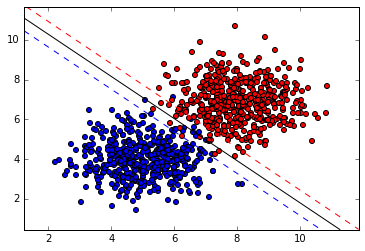

In [56]:
reload(lab3)
lab3.visualize(X, y, res['w0'], res['w'])

In [57]:
reload(lab3)
res = lab3.svm_qp_dual_solver(X, y, 1, gamma=0.2)

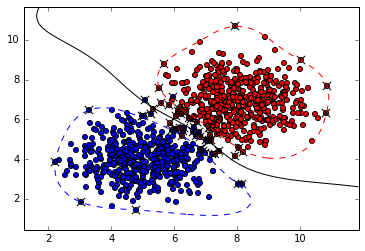

In [58]:
reload(lab3)
lab3.visualize(X, y, res['w0'], res['w'], res['A'], gamma=0.2)

In [59]:
reload(lab3)
res = lab3.svm_liblinear_solver(X, y, 1, max_iter=100)

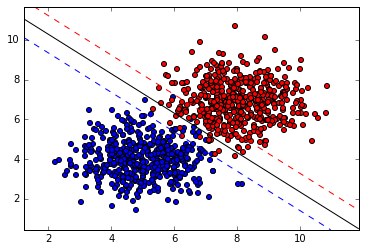

In [60]:
reload(lab3)
lab3.visualize(X, y, res['w0'], res['w'])

In [61]:
reload(lab3)
res = lab3.svm_libsvm_solver(X, y, 1, gamma=0.2)

C:\Users\Татьяна\Anaconda3\lib\site-packages\sklearn\svm\base.py:224: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


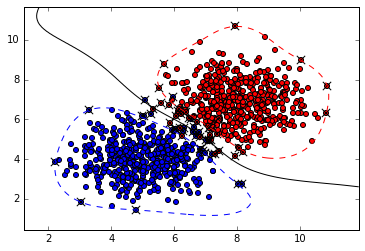

In [62]:
reload(lab3)
lab3.visualize(X, y, res['w0'], res['w'], res['A'], gamma=0.2)

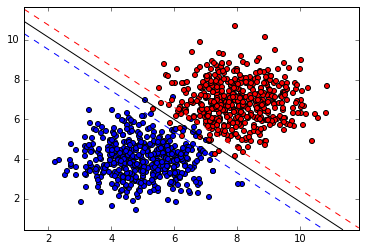

In [65]:
reload(lab3)
res = lab3.svm_subgradient_solver(X, y, 1, max_iter=1500)
lab3.visualize(X, y, res['w0'], res['w'])

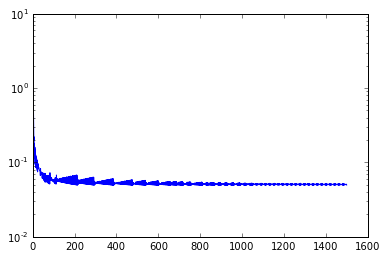

In [66]:
crv = res['objective_curve']
plt.semilogy(np.arange(crv.size), np.abs(crv - ans))
plt.show()